# Análise de sentimentos com NLTK

## Introdução
Uma grande quantidade de dados gerados hoje não é estruturada , o que requer processamento para gerar insights. Alguns exemplos de dados não estruturados são artigos de notícias, postagens nas mídias sociais e histórico de pesquisas. O processo de analisar e entender a linguagem natural se enquadra no campo do Processamento de Linguagem Natural (PNL). A análise de sentimentos é uma tarefa comum da PNL, que envolve a classificação de textos ou partes de textos em um sentimento predefinido. Você usará o NLTK (Natural Language Toolkit) , uma biblioteca NLP comumente usada em Python, para analisar dados textuais.

Neste tutorial, você preparará um conjunto de dados de exemplo de tweets do pacote NLTK para NLP com diferentes métodos de limpeza de dados. Quando o conjunto de dados estiver pronto para processamento, você treinará um modelo em tweets pré-classificados e usará o modelo para classificar os tweets de amostra em sentimentos negativos e positivos.

Este artigo pressupõe que você esteja familiarizado com os conceitos básicos do Python (consulte nossa seção Como codificar na série Python 3 ), principalmente com o uso de estruturas, classes e métodos de dados. O tutorial pressupõe que você não tenha experiência em PNL e `nltk`, embora alguns conhecimentos sejam uma vantagem adicional.

## Pré-requisitos
- Este tutorial é baseado na versão 3.6.5 do Python. Se você não possui o Python 3 instalado, aqui está um guia para instalar e configurar um ambiente de programação local para o Python 3 .
- Recomenda-se familiaridade no trabalho com dados de idioma. Se você é novo no uso do NLTK, consulte o Como trabalhar com dados de idioma no Python 3 usando o guia Natural Language Toolkit (NLTK) .


## Etapa 1 - Instalando o NLTK e baixando os dados
Você usará o pacote NLTK no Python para todas as tarefas NLP neste tutorial. Nesta etapa, você instalará o NLTK e fará o download dos tweets de amostra que você usará para treinar e testar seu modelo.

Primeiro, instale o pacote NLTK com o `pip` gerenciador de pacotes:

```shell
pip install nltk==3.3
```

Este tutorial usará exemplos de tweets que fazem parte do pacote NLTK. Primeiro, inicie uma sessão interativa Python executando o seguinte comando:

```shell
python3
```


Em seguida, importe o `nltk` módulo no interpretador python.

In [52]:
import nltk

Faça o download dos tweets de amostra do pacote NLTK:

In [53]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

A execução desse comando no interpretador Python baixa e armazena os tweets localmente. Depois que as amostras são baixadas, elas ficam disponíveis para seu uso.

Você usará os tweets negativos e positivos para treinar seu modelo na análise de sentimentos posteriormente no tutorial. Os tweets sem sentimentos serão usados para testar seu modelo.

Se você quiser usar seu próprio conjunto de dados, poderá coletar tweets de um período, usuário ou hashtag específico usando a API do Twitter .

Agora que você importou NLTK e baixado os tweets de amostra, saia da sessão interativa inserindo nos `exit()`. Você está pronto para importar os tweets e começar a processar os dados.

## Etapa 2 - Tokenizando os Dados
O idioma em sua forma original não pode ser processado com precisão por uma máquina; portanto, você precisa processar o idioma para facilitar o entendimento da máquina. A primeira parte de entender os dados é através de um processo chamado tokenização , ou a divisão de strings em partes menores, chamadas tokens .

Um token é uma sequência de caracteres no texto que serve como uma unidade. Com base em como você cria os tokens, eles podem consistir em palavras, emoticons, hashtags, links ou até caracteres individuais. Uma maneira básica de dividir o idioma em tokens é dividir o texto com base em espaço em branco e pontuação.

Para começar, crie um novo `.py` arquivo para armazenar seu script. Este tutorial usará `nlp_test.py`:

```shell
nano nlp_test.py
```

Neste arquivo, você primeiro importará o arquivo `twitter_samples` para poder trabalhar com esses dados:

nlp_test.py

In [54]:
from nltk.corpus import twitter_samples

Isso importará três conjuntos de dados do NLTK que contêm vários tweets para treinar e testar o modelo:

- negative_tweets.json: 5000 tweets com sentimentos negativos
- positive_tweets.json: 5000 tweets com sentimentos positivos
- tweets.20150430-223406.json: 20000 tweets sem sentimentos

Em seguida, criar variáveis para `positive_tweets`, `negative_tweets` e `text`:

`nlp_test.py`

In [55]:
from nltk.corpus import twitter_samples 
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

O ```strings()``` método de `twitter_samples` imprimirá todos os tweets em um conjunto de dados como seqüências de caracteres. Definir as diferentes coleções de tweets como uma variável facilitará o processamento e o teste.

Antes de usar um tokenizer no NLTK, você precisa baixar um recurso adicional `punkt`,. O `punkt` módulo é um modelo pré-treinado que ajuda a tokenizar palavras e frases. Por exemplo, esse modelo sabe que um nome pode conter um ponto (como "S. Daityari") e a presença desse período em uma frase não necessariamente o termina. Primeiro, inicie uma sessão interativa Python:
- python3

Execute os seguintes comandos na sessão para baixar o punktrecurso:



In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Quando o download estiver concluído, você estará pronto para usar os tokenizadores do NLTK. O NLTK fornece um tokenizer padrão para tweets com o `.tokenized()` método Adicione uma linha para criar um objeto que tokenize o `positive_tweets.json` conjunto de dados:

`nlp_test.py`

In [57]:
from nltk.corpus import twitter_samples 
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json') 
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

Se você deseja testar o script para ver o `.tokenized` método em ação, adicione o conteúdo realçado ao seu `nlp_test.py` script. Isso irá tokenizar um único tweet do `positive_tweets.json` conjunto de dados:

`nlp_test.py`

In [58]:
from nltk.corpus import twitter_samples 
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json') 
text = twitter_samples.strings('tweets.20150430-223406.json') 
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]
print(tweet_tokens[0])

#FollowFriday


Salve e feche o arquivo e execute o script:

```python
python3 nlp_test.py
```

O processo de tokenização leva algum tempo porque não é uma simples divisão no espaço em branco. Após alguns momentos de processamento, você verá o seguinte:

In [59]:
print(tweet_tokens)

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']



Aqui, o `.tokenized()` método retorna caracteres especiais como `@` e `_`. Esses caracteres serão removidos através de expressões regulares mais adiante neste tutorial.

Agora que você viu como o `.tokenized()` método funciona, certifique-se de comentar ou remover a última linha para imprimir o tweet tokenizado do script, adicionando um #ao início da linha:

`nlp_test.py`

In [60]:
from nltk.corpus import twitter_samples 
positive_tweets = twitter_samples.strings('positive_tweets.json') 
negative_tweets = twitter_samples.strings('negative_tweets.json') 
text = twitter_samples.strings('tweets.20150430-223406.json') 
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]
 #print(tweet_tokens[0])

Seu script agora está configurado para tokenizar dados. Na próxima etapa, você atualizará o script para normalizar os dados.

## Etapa 3 - Normalizando os dados

As palavras têm formas diferentes - por exemplo, "correu", "corre" e "corre" são várias formas do mesmo verbo, "correr". Dependendo do requisito de sua análise, todas essas versões podem precisar ser convertidas para o mesmo formulário, "executar". A normalização na PNL é o processo de converter uma palavra em sua forma canônica.

A normalização ajuda a agrupar palavras com o mesmo significado, mas com formas diferentes. Sem normalização, "correu", "corre" e "corre" seriam tratados como palavras diferentes, mesmo que você queira que eles sejam tratados com a mesma palavra. Nesta seção, você explora a stemming e a lematização , que são duas técnicas populares de normalização.

Stemming é um processo de remoção de afixos de uma palavra. O stemming, trabalhando apenas com formas verbais simples, é um processo heurístico que remove os fins das palavras.

Neste tutorial, você usará o processo de lematização, que normaliza uma palavra com o contexto de vocabulário e análise morfológica das palavras no texto. O algoritmo de lematização analisa a estrutura da palavra e seu contexto para convertê-la em uma forma normalizada. Portanto, tem um custo de velocidade. Uma comparação entre derivação e lematização se resume a uma troca entre velocidade e precisão.

Antes de continuar usando a lematização, faça o download dos recursos necessários inserindo o seguinte em uma sessão interativa do Python:

`python3`

Execute os seguintes comandos na sessão para baixar os recursos:

In [61]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

`wordnet` é um banco de dados lexical para o idioma inglês que ajuda o script a determinar a palavra base. Você precisa do `averaged_perceptron_tagger` recurso para determinar o contexto de uma palavra em uma frase.

Uma vez baixado, você está quase pronto para usar o lematizador. Antes de executar um lematizador, você precisa determinar o contexto para cada palavra em seu texto. Isso é obtido por um algoritmo de marcação, que avalia a posição relativa de uma palavra em uma frase. Em uma sessão Python, importe a pos_tagfunção e forneça uma lista de tokens como argumento para obter as tags. Vamos tentar isso em Python:


Aqui está a saída da pos_tag função.

In [62]:
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


Na lista de tags, aqui está a lista dos itens mais comuns e seu significado:

`NNP`: Substantivo, próprio, singular

`NN`: Substantivo, comum, singular ou de massa

`IN`: Preposição ou conjunção, subordinação

`VBG`: Partícula verbal, gerúndria ou presente

`VBN`: Verbo, particípio passado

Aqui está uma lista completa do conjunto de dados .

Em geral, se uma tag começa com `NN`, a palavra é um substantivo e se inicia com `VB`, a palavra é um verbo. Após revisar as tags, saia da sessão do Python digitando `exit()`.

Para incorporar isso a uma função que normaliza uma frase, você deve primeiro gerar as tags para cada token no texto e, em seguida, deixar cada palavra usando a tag.

Atualize o `nlp_test.py` arquivo com a seguinte função que elimina uma frase:

`nlp_test.py`

In [63]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence 
print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


Este código importa a `WordNetLemmatizer` classe e a inicializa em uma variável `lemmatizer`,.

A função `lemmatize_sentence` primeiro obtém a tag de posição de cada token de um tweet. Na `if` declaração, se a tag começar `NN`, o token será atribuído como um substantivo. Da mesma forma, se a tag começar `VB`, o token será atribuído como um verbo.

Salve e feche o arquivo e execute o script:

```shell
python3 nlp_test.py
```

Aqui está a saída:

In [64]:
print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


Você notará que o verbo `being` muda para sua forma raiz bee o substantivo `members` muda para `member`. Antes de prosseguir, comente a última linha que imprime o tweet de amostra do script.

Agora que você criou com êxito uma função para normalizar as palavras, está pronto para remover o ruído.

## Etapa 4 - Removendo o ruído dos dados
Nesta etapa, você removerá o ruído do conjunto de dados. Ruído é qualquer parte do texto que não adiciona significado ou informação aos dados.

O ruído é específico para cada projeto; portanto, o que constitui ruído em um projeto pode não estar em um projeto diferente. Por exemplo, as palavras mais comuns em um idioma são chamadas de _palavras de parada_ . Alguns exemplos de palavras de parada são "é", "o" e "a". Eles geralmente são irrelevantes ao processar o idioma, a menos que um caso de uso específico justifique sua inclusão.

Neste tutorial, você usará expressões regulares no Python para procurar e remover esses itens:

- Hiperlinks - Todos os links para Twitter são convertidos para o URL Shortener t.co . Portanto, mantê-los no processamento de texto não agregaria nenhum valor à análise.
- Manipulações do Twitter em respostas - esses nomes de usuário do Twitter são precedidos por um @símbolo que não transmite nenhum significado.
- Pontuação e caracteres especiais - Embora eles geralmente forneçam contexto para dados textuais, esse contexto geralmente é difícil de processar. Para simplificar, você removerá toda a pontuação e caracteres especiais dos tweets.


Para remover os hiperlinks, você precisa primeiro procurar uma substring que corresponda a um URL que comece com `http://` ou `https://`, seguido por letras, números ou caracteres especiais. Depois que um padrão é correspondido, o `.sub()` método o substitui por uma sequência vazia.

Como normalizamos as formas de palavras na `remove_noise()` função, você pode comentar a `lemmatize_sentence()` função no script.

Adicione o seguinte código ao seu nlp_test.pyarquivo para remover o ruído do conjunto de dados:
```
nlp_test.py
```

In [65]:
import re, string 
def remove_noise(tweet_tokens, stop_words = ()):
    cleaned_tokens = []
    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

Esse código cria uma `remove_noise()` função que remove o ruído e incorpora a normalização e a lematização mencionadas na seção anterior. O código usa dois argumentos: os tokens do tweet e a tupla de palavras de parada.

O código então usa um loop para remover o ruído do conjunto de dados. Para remover os hiperlinks, o código primeiro procura uma substring que corresponda a uma URL iniciada com `http://` ou `https://`, seguida por letras, números ou caracteres especiais. Depois que um padrão é correspondido, o `.sub()` método o substitui por uma sequência vazia, ou ''.

Da mesma forma, para remover `@` menções, o código substitui a parte relevante do texto usando expressões regulares. O código usa a `re` biblioteca para procurar `@` símbolos, seguidos por números, letras ou `_`, e os substitui por uma sequência vazia.

Por fim, você pode remover a pontuação usando a biblioteca `string`.

Além disso, você também removerá as palavras de parada usando um conjunto interno de palavras de parada no NLTK, que precisa ser baixado separadamente.

Execute o seguinte comando em uma sessão interativa do Python para baixar este recurso:

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Após o download do recurso, saia da sessão interativa.

Você pode usar o `.words()` método para obter uma lista de palavras de parada em inglês. Para testar a função, vamos executá-la em nosso exemplo de tweet. Adicione as seguintes linhas ao final do `nlp_test.py` arquivo:

In [67]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') 
print(remove_noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


Observe que a função remove todas as `@` menções, interrompe as palavras e converte as palavras em minúsculas.

Antes de prosseguir para o exercício de modelagem na próxima etapa, use a `remove_noise()` função para limpar os tweets positivos e negativos. Comente a linha para imprimir a saída do `remove_noise()` tweet de amostra e adicione o seguinte ao `nlp_test.py` script:

In [68]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') 
#print(remove_noise(tweet_tokens[0], stop_words)) 
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []
for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

Agora que você adicionou o código para limpar os tweets de amostra, você pode comparar os tokens originais aos tokens limpos de um tweet de amostra. Se você quiser testar isso, adicione o seguinte código ao arquivo para comparar as duas versões do 500º tweet na lista:

In [69]:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


Salve e feche o arquivo e execute o script. Na saída, você verá que a pontuação e os links foram removidos e as palavras foram convertidas em minúsculas.

Há certos problemas que podem surgir durante o pré-processamento de texto. Por exemplo, palavras sem espaços ("iLoveYou") serão tratadas como uma e pode ser difícil separá-las. Além disso, "Hi", "Hii" e "Hiiiii" serão tratados de maneira diferente pelo script, a menos que você escreva algo específico para resolver o problema. É comum ajustar o processo de remoção de ruído para seus dados específicos.

Agora que você viu a `remove_noise()` função em ação, não deixe de comentar ou remover as duas últimas linhas do script para adicionar mais:

In [70]:
#print(positive_tweet_tokens[500])
#print(positive_cleaned_tokens_list[500])

Nesta etapa, você removeu o ruído dos dados para tornar a análise mais eficaz. Na próxima etapa, você analisará os dados para encontrar as palavras mais comuns em seu conjunto de dados de amostra.

## Etapa 5 - Determinando a densidade da palavra
A forma mais básica de análise de dados textuais é retirar a palavra frequência. Um único tweet é uma entidade muito pequena para descobrir a distribuição das palavras; portanto, a análise da frequência das palavras seria feita em todos os tweets positivos.

O fragmento a seguir define uma função geradora , chamada `get_all_words`, que recebe uma lista de tweets como argumento para fornecer uma lista de palavras em todos os tokens de tweet associados. Adicione o seguinte código ao seu `nlp_test.py` arquivo:

In [71]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token 
all_pos_words = get_all_words(positive_cleaned_tokens_list)

Agora que você compilou todas as palavras na amostra de tweets, pode descobrir quais são as palavras mais comuns usando a `FreqDist` classe NLTK. Adicionando o seguinte código ao `nlp_test.py` arquivo:

In [72]:
from nltk import FreqDist 
freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


O `.most_common()` método lista as palavras que ocorrem com mais frequência nos dados. Salve e feche o arquivo depois de fazer essas alterações.

Ao executar o arquivo agora, você encontrará os termos mais comuns nos dados:

In [73]:
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


A partir desses dados, você pode ver que as entidades de emoticons formam algumas das partes mais comuns dos tweets positivos. Antes de prosseguir para a próxima etapa, não deixe de comentar a última linha do script que imprime os dez principais tokens.

Para resumir, você extraiu os tweets nltk, tokenizou, normalizou e limpou os tweets para uso no modelo. Por fim, você também analisou as frequências de tokens nos dados e verificou as frequências dos dez principais tokens.

Na próxima etapa, você preparará os dados para a análise de sentimentos.

## Etapa 6 - Preparando dados para o modelo
A análise de sentimentos é um processo de identificação de uma atitude do autor sobre um tópico sobre o qual está sendo escrito. Você criará um conjunto de dados de treinamento para treinar um modelo. É um processo de aprendizado de máquina de aprendizado supervisionado, que exige que você associe cada conjunto de dados a um "sentimento" de treinamento. Neste tutorial, seu modelo usará os sentimentos "positivo" e "negativo".

A análise de sentimentos pode ser usada para categorizar o texto em uma variedade de sentimentos. Para simplificar e disponibilizar o conjunto de dados de treinamento, este tutorial ajuda a treinar seu modelo em apenas duas categorias, positiva e negativa.

Um modelo é uma descrição de um sistema usando regras e equações. Pode ser tão simples quanto uma equação que prevê o peso de uma pessoa, dada a sua altura. Um modelo de análise de sentimentos que você criará associaria os tweets a um sentimento positivo ou negativo. Você precisará dividir seu conjunto de dados em duas partes. O objetivo da primeira parte é construir o modelo, enquanto a próxima parte testa o desempenho do modelo.

Na etapa de preparação dos dados, você preparará os dados para análise de sentimentos convertendo tokens para o formulário do dicionário e depois os dividirá para fins de treinamento e teste.

### Convertendo tokens em um dicionário
Primeiro, você preparará os dados a serem alimentados no modelo. Você usará o classificador Naive Bayes no NLTK para executar o exercício de modelagem. Observe que o modelo requer não apenas uma lista de palavras em um tweet, mas um dicionário Python com palavras como chaves e `True` como valores. A função a seguir cria uma função de gerador para alterar o formato dos dados limpos.

Adicione o código a seguir para converter os tweets de uma lista de tokens limpos em dicionários com chaves como tokens e `True` valores. Os dicionários correspondentes são armazenados em `positive_tokens_for_model` e `negative_tokens_for_model`.

In [74]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens) 
positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

### Divisão do conjunto de dados para treinamento e teste do modelo
Em seguida, você precisa preparar os dados para treinar a NaiveBayesClassifierturma. Adicione o seguinte código ao arquivo para preparar os dados:

In [75]:
import random 
positive_dataset = [(tweet_dict, "Positive")for tweet_dict in positive_tokens_for_model] 
negative_dataset = [(tweet_dict, "Negative")for tweet_dict in negative_tokens_for_model] 
dataset = positive_dataset + negative_dataset 
random.shuffle(dataset) 
train_data = dataset[:7000]
test_data = dataset[7000:]

Este código anexa um rótulo `Positive` ou `Negative` a cada tweet. Em seguida, cria um `dataset` juntando os tweets positivos e negativos.

Por padrão, os dados contêm todos os tweets positivos, seguidos por todos os tweets negativos em sequência. Ao treinar o modelo, você deve fornecer uma amostra dos seus dados que não contenha viés. Para evitar distorções, você adicionou o código para organizar os dados aleatoriamente usando o `.shuffle()` método de `random`.

Finalmente, o código divide os dados embaralhados em uma proporção de 70:30 para treinamento e teste, respectivamente. Como o número de tweets é 10000, você pode usar os primeiros 7000 tweets do conjunto de dados embaralhados para treinar o modelo e os 3000 finais para testar o modelo.

Nesta etapa, você converteu os tokens limpos em um formulário de dicionário, embaralhou aleatoriamente o conjunto de dados e o dividiu em dados de treinamento e teste.

## Etapa 7 - Criando e testando o modelo
Por fim, você pode usar a `NaiveBayesClassifier` classe para construir o modelo. Use o `.train()` método para treinar o modelo e o `.accuracy()` método para testar o modelo nos dados de teste.

In [76]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data) 
print("Accuracy is:", classify.accuracy(classifier, test_data)) 
print(classifier.show_most_informative_features(10))

Accuracy is: 0.996
Most Informative Features
                      :( = True           Negati : Positi =   2086.5 : 1.0
                      :) = True           Positi : Negati =   1642.0 : 1.0
                follower = True           Positi : Negati =     37.7 : 1.0
                followed = True           Negati : Positi =     24.8 : 1.0
                     sad = True           Negati : Positi =     22.2 : 1.0
                    glad = True           Positi : Negati =     18.0 : 1.0
               community = True           Positi : Negati =     15.4 : 1.0
                      aw = True           Negati : Positi =     15.3 : 1.0
                 welcome = True           Positi : Negati =     15.0 : 1.0
                    sick = True           Negati : Positi =     11.6 : 1.0
None


Salve, feche e execute o arquivo após adicionar o código. A saída do código será a seguinte:

A precisão é definida como a porcentagem de tweets no conjunto de dados de teste para o qual o modelo foi capaz de prever corretamente o sentimento. Uma precisão de 99,5% no conjunto de testes é muito boa.

Na tabela que mostra os recursos mais informativos, todas as linhas da saída mostram a taxa de ocorrência de um token em tweets com tags positivas e negativas no conjunto de dados de treinamento. A primeira linha nos dados significa que, em todos os tweets que contêm o token `:(`, a proporção de tweets negativos para positivos era `2085.6` de `1`. Curiosamente, parece que havia um token `:(` nos conjuntos de dados positivos. Você pode ver que os dois principais itens discriminatórios do texto são os emoticons. Além disso, palavras tais como `sad` chumbo para sentimentos negativos, enquanto que `welcome` e `glad` estão associados com sentimentos positivos.

Em seguida, você pode verificar o desempenho do modelo em tweets aleatórios do Twitter. Adicione este código ao arquivo:

In [77]:
from nltk.tokenize import word_tokenize 
custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
custom_tokens = remove_noise(word_tokenize(custom_tweet)) 
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


Esse código permitirá testar tweets personalizados, atualizando a string associada à custom_tweetvariável. Salve e feche o arquivo depois de fazer essas alterações.

Execute o script para analisar o texto personalizado. Aqui está a saída para o texto personalizado no exemplo:

In [78]:
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


Você também pode verificar se ele caracteriza os tweets positivos corretamente:

In [79]:
custom_tweet = 'Congrats #SportStar on your 7th best goal from last season winning goal of the year :) #Baller #Topbin #oneofmanyworldies'

Aqui está a saída:

In [80]:
custom_tokens = remove_noise(word_tokenize(custom_tweet)) 
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Positive


Agora que você testou sentimentos positivos e negativos, atualize a variável para testar sentimentos mais complexos, como o sarcasmo.

In [81]:
custom_tweet = 'Thank you for sending my baggage to CityX and flying me to CityY at the same time. Brilliant service. #thanksGenericAirline'

Aqui está a saída:

In [82]:
custom_tokens = remove_noise(word_tokenize(custom_tweet)) 
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Positive


O modelo classificou este exemplo como positivo. Isso ocorre porque os dados de treinamento não eram abrangentes o suficiente para classificar os tweets sarcásticos como negativos. Caso deseje que seu modelo preveja o sarcasmo, você precisará fornecer uma quantidade suficiente de dados de treinamento para treiná-lo adequadamente.

Nesta etapa, você construiu e testou o modelo. Você também explorou algumas de suas limitações, como não detectar sarcasmo em exemplos específicos. Seu código completo ainda possui artefatos restantes após seguir o tutorial, portanto, a próxima etapa o guiará no alinhamento do código às melhores práticas do Python.

## Etapa 8 - Limpando o código (opcional)
Embora você tenha concluído o tutorial, é recomendável reorganizar o código no nlp_test.pyarquivo para seguir as práticas recomendadas de programação. De acordo com as práticas recomendadas, seu código deve atender a este critério:

- Todas as importações devem estar na parte superior do arquivo. As importações da mesma biblioteca devem ser agrupadas em uma única instrução.
- Todas as funções devem ser definidas após as importações.
- Todas as instruções no arquivo devem ser alojadas em uma 
`if __name__ == "__main__":` condição. Isso garante que as instruções não sejam executadas se você estiver importando as funções do arquivo em outro arquivo.
Também removeremos o código comentado, seguindo o tutorial, juntamente com a `lemmatize_sentence` função, pois a lematização é concluída pela nova `remove_noise` função.

Aqui está a versão limpa de `nlp_test.py`:

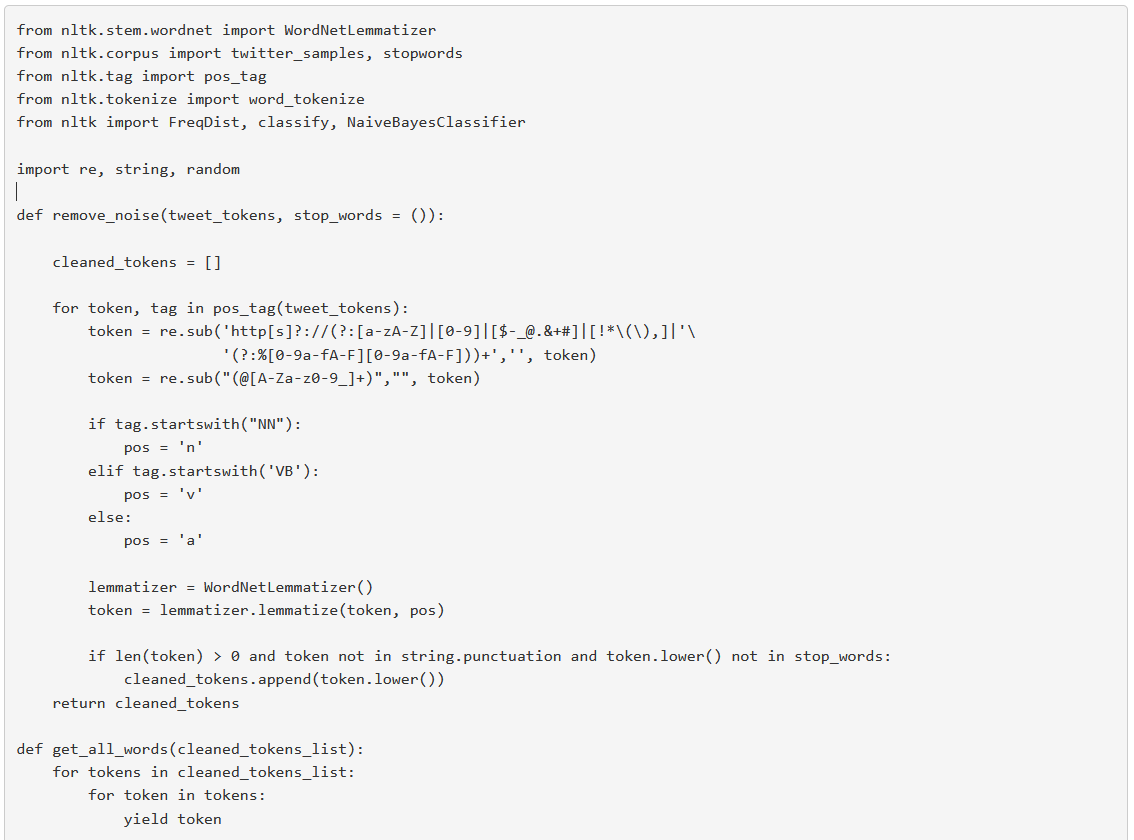

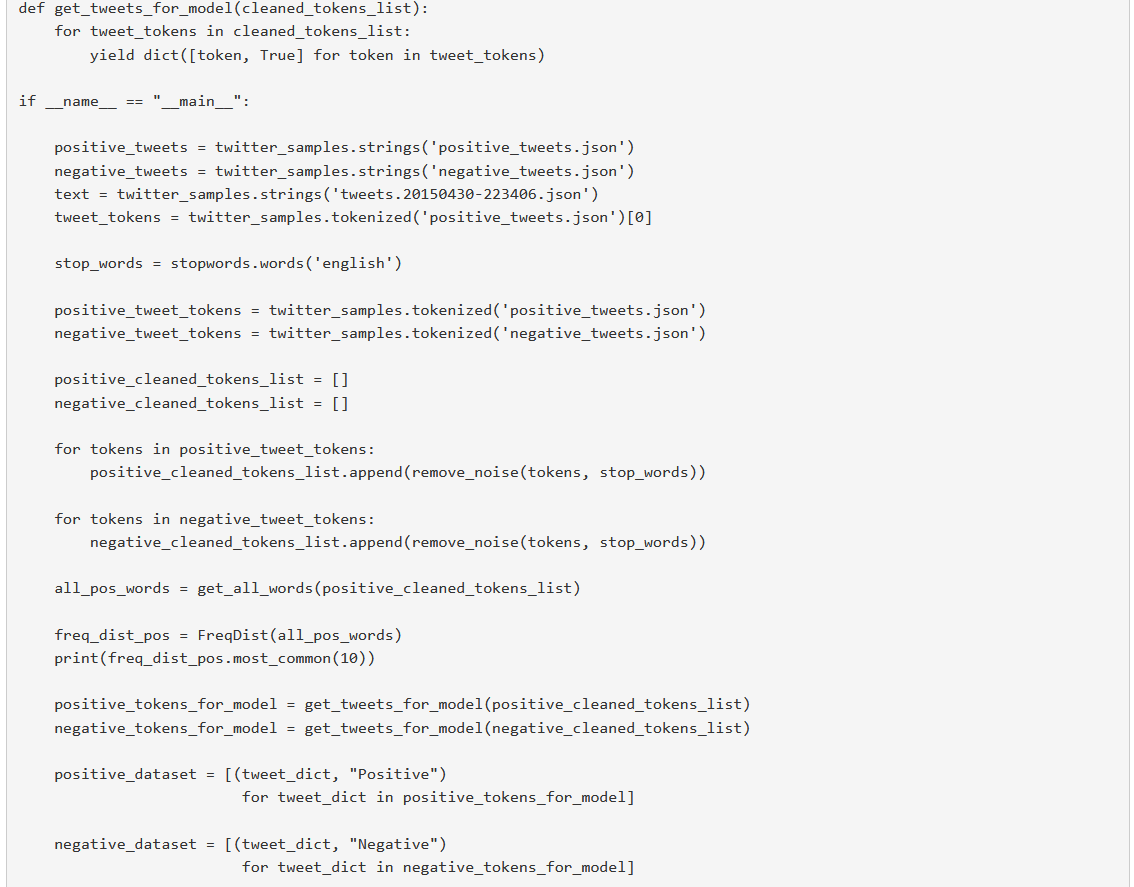

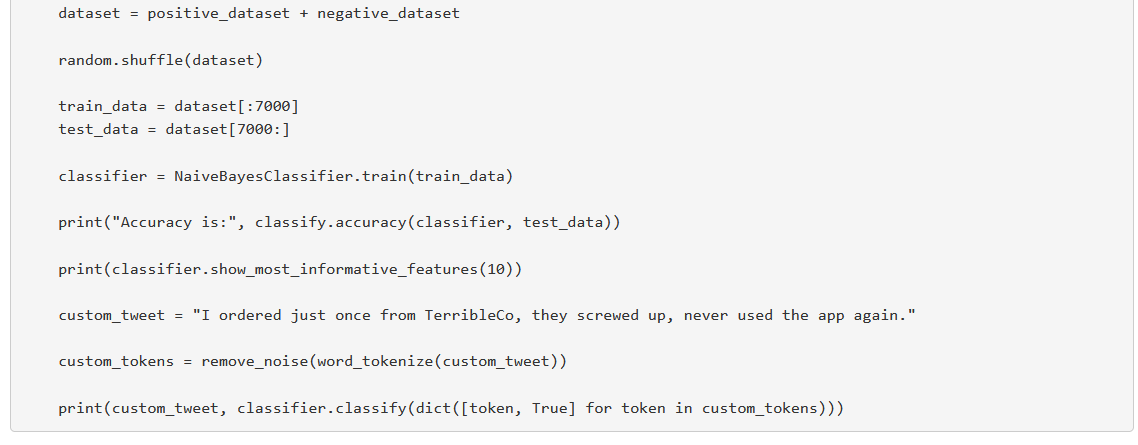

## Conclusão
Este tutorial apresentou um modelo básico de análise de sentimentos usando a nltkbiblioteca do Python 3. Primeiro, você executava o pré-processamento nos tweets, simbolizando um tweet, normalizando as palavras e removendo o ruído. Em seguida, você visualizou itens que ocorrem com frequência nos dados. Por fim, você construiu um modelo para associar tweets a um sentimento específico.

> Teste

```python
from nltk.tokenize import word_tokenize 
custom_tweet = "I ordered just once from TerribleCo, they screwed up gain."
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(
    classifier.classify(
        dict([token, True] for token in custom_tokens)
    )
)
```

- [ ] após impletmentar todo o artigo verifca-se que a sáida deste código é : `Positive`
- [ ] após implementar todo o artigo verifca-se que a sáida deste código é : `Negative`  

In [83]:
from nltk.tokenize import word_tokenize 
custom_tweet = "I ordered just once from TerribleCo, they screwed up gain."
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(
    classifier.classify(
        dict([token, True] for token in custom_tokens)
    )
)

Positive


- [x] após impletmentar todo o artigo verifca-se que a sáida deste código é : `Positive`